# Estadística
Cuando trabajamos con grandes cantidades de datos muchas veces podemos reducir la información a unos pocos valores que nos digan como se comportan. Para eso usamos estadística. 

En esta notebook usaremos el paquete **NumPy** para poder hacer operaciones matématicas algo más complejas o usar definiciones de estimadores estadísticos ya definidos. Para hacer visualizaciones usaremos `matplolib`. 


<ul style="list-style-type:none">
    <li><a href='#1.-Medidas-de-centralización'>1. Medidas de centralización</a></li>
    <li><a href="#2.-Medidas-de-dispersion">2. Medidas de dispersión </a></li>
    <li><a href="#3.-Regresión-y-correlación">3. Regresión y correlación </a></li>
    <li><a href="#4.-Ejercicios-para-practicar">4. Ejercicios </a></li>



</ul>

## 1. Medidas de centralización
Son las medidas centrales de los datos, nos dan una idea de la magnitud de estos. Nos permiten apreciar diferencias entre muestras. Aquí vemos las más utilizadas: 

La **media** es la suma de todos los datos dividido por el tamaño de la muestro: 
    $x=\frac{1}{n}\sum x_i$.
    
La **mediana** es la cantidad tal que el número de datos menores y mayores es igual. Sería ordenar la muestra y coger el valor central

La **moda** es el dato que más veces se repite. Si hacemos un histograma, será el más elevado.  La moda no es una buena medida cuando hay muy pocos datos. 

Cuando la distribución es Gaussiana se suelen parecer estos estimadores del valor central, pero para distribuciones més complicadas pueden dar informaciones valuosas las tres medidas.

<img src="img/medidas_centrales.png" width=600 height=400 />

Usaremos el archivo AlturaPeso.csv para ver unos ejemplos usando las funciones definidas en `numpy`.

In [87]:
# Leemos el archivo con pandas y guardamos los datos en x y en y. 

import pandas as pd

datos = pd.read_csv("data/AlturaPeso.csv")

x = datos["Altura"]
y = datos["Peso"]

In [88]:
import matplotlib.pyplot as pl
import numpy as np

Primero de todo lo representamos gráficamente

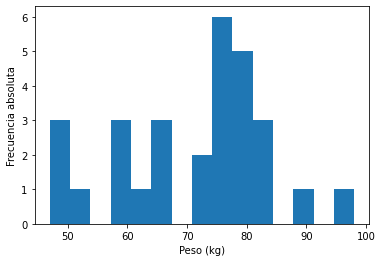

In [3]:
pl.hist(y, bins=15)
pl.xlabel("Peso (kg)")
pl.ylabel("Frecuencia absoluta");

- Media muestral

In [80]:
np.mean(y)

71.0

- Mediana

In [81]:
np.median(y)

75.0

- Moda

In [82]:
# no esté en numy
import statistics as stat

stat.mode(y)

75

Como vemos se parecen mucho, la primera es ligeramente más baja porque le pesa más los valores extremos. Imaginemos que en esa muestra se añade sin querer a un niño que pesa 20 kg.



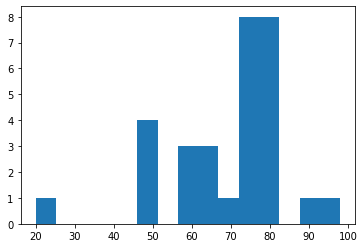

In [83]:
peso = list(y)
peso.append(20)
pl.hist(peso, bins=15);

In [8]:
np.mean(peso)

69.3

In [9]:
np.median(peso)

75.0

In [10]:
stat.mode(y)

75

Como vemos la media cambiar por un solo individuo muy marcado mientras que las otras 2 no. En este caso sería más representativo de la población usar las mediana o la moda como valor central. 

## 2. Medidas de dispersión
La medida de posición central es normalmente insuficiente para hacer un resumen de los datos, dos distribuciones pueden coincidir en la media pero ser muy distinto.  

<img src="img/sigmas.png" width=500 height=400 />

Para tener más información sobre nuestro datos buscamos medir la dispersión. Las más utilizadas son:

* El **recorrido** : distancia entre el mayor y el menor elemento de la muestra.

* La **varianza**: Suma de desviaciones de la muestra respecto a la media

$ \sigma^2 = \frac{1}{n}\sum(x_i-<x>)^2$

* La **desviación típica** que es la raíz cuadrada de la varianza

$\sigma = \sqrt{\sigma^2}$

* Cuartiles. Percentil del 25\%, del 50\% y del 75\%. El segundo cuartil es la mediana.
 
La más usada es la desviación típica, pero es menos útil cuanto más asimétrica es la distribución de los datos. En cuyo caso los cuartiles pueden ser más interesantes. 

Recorrido

In [11]:
def rec(data):
    return max(data) - min(data)
print('El recorrido de los pesos es : {:.2f}'.format(rec(y)))
print('El recorrido de las alturas es: ', np.round(rec(x),2))

El recorrido de los pesos es : 51.00
El recorrido de las alturas es:  33


Desviación típica

In [12]:
# desviación típiica
print('La desviación típica de los pesos es : {:.2f}'.format(np.std(y)))
print('La desviación típica de las alturas es: ', np.round(np.std(x),2))

La desviación típica de los pesos es : 12.22
La desviación típica de las alturas es:  7.72


En realidad la desviación típica muestral, donde la media ha sido calculada a partir de la muestra y no es el valor real
, en vez de dividir por N se divide por N-1. Esto se puede añadir con el parámetro `ddof`, tal que el denominador es `N-ddof`. Para N grandes la diferencia es poca, pero para N pequeña la diferencia puede ser más importante.

In [13]:
print('La desviación típica de los pesos es : {:.2f}'.format(np.std(y,ddof=1)))
print('La desviación típica de las alturas es: ', np.round(np.std(x,ddof=1),2))

La desviación típica de los pesos es : 12.44
La desviación típica de las alturas es:  7.86


También es interesante ver el coeficiente de variación, que es la desviación típica divida por la media de la muestra

In [14]:
print('{:.2f}'.format(np.std(y,ddof=1)/np.mean(y)))
print(np.round(np.std(x,ddof=1)/np.mean(x),2))

0.18
0.04


Es una manera de compara dos distribuciones de magnitudes distintas, como por ejemplo si quisieramos comparar la dispersión peso de hormigas, dispersión peso de elefantes.

In [15]:
print('La varianza de los pesos es : {:.2f}'.format(np.var(y,ddof=1)))
print('La varianza de las alturas es: ', np.round(np.var(x,ddof=1),2))

La varianza de los pesos es : 154.64
La varianza de las alturas es:  61.76


In [16]:
q75, q50, q25 = np.percentile(x, [75 ,50, 25])
print('Los cuartiles de las alturas del 25% es {}, del 50% {} y de 75% {}'.format(q25,q50,q75))

Los cuartiles de las alturas del 25% es 171.0, del 50% 176.0 y de 75% 181.0


In [17]:
q75, q50, q25 = np.percentile(y, [75 ,50, 25])
print('Los cuartiles de los pesos del 25% es {}, del 50% {} y de 75% {}'.format(q25,q50,q75))

Los cuartiles de los pesos del 25% es 62.0, del 50% 75.0 y de 75% 80.0


**Simetría**
La manera más rápida de ver si una población se comporta de manera simétrica con respecto al valor central es visualizarla. 

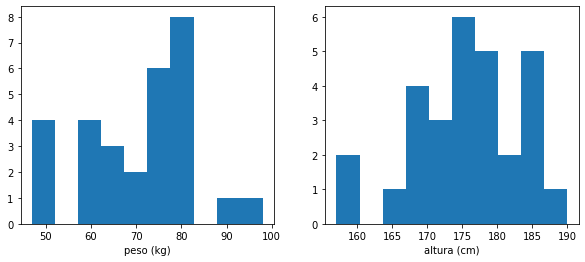

In [18]:
# Miramos las distribuciones de peso y de altura
pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
pl.hist(y)
pl.xlabel('peso (kg)');
pl.subplot(1,2,2)
pl.hist(x)
pl.xlabel('altura (cm)');

Si necesitamos cuantificarlo, por ejemplo si tenemos que analizar muchas poblaciones no podemos andar mirando cada gráfica, 
. Entonces podemos mirarlo con la distancia entre **cuartiles**.  Comparar el recorrido entre los cuartiles q75-q50 y q50 - q25, nos dará una idea de cuan símetrica es la distribución.

In [19]:
q75, q50, q25 = np.percentile(x, [75 ,50, 25])
print('distancia entre cuatriles alturas', q75 - q50, q50 - q25)

distancia entre cuatriles alturas 5.0 5.0


In [20]:
q75, q50, q25 = np.percentile(y, [75 ,50, 25])
print('distancia entre cuartiles pesos', q75 - q50, q50 - q25)

distancia entre cuartiles pesos 5.0 13.0


Como se veía en la visualización es más simétrica la distribución de alturas. Otra medida para calcular la simetría es calcular la **skewness** de la distribución, que sería el momento de orden 3. 

$ s = \frac{1}{n}\frac{\sum(x_i-<x>)^3}{\sigma^3}$

Si la **skewness** es negativa quiere decir que la cola de la izquierda es mayor que la de la derecha, y si es positiva al revés. 

In [21]:
import scipy.stats as st
st.skew(y)        
        

-0.2497098762561793

In [22]:
st.skew(x)  

-0.4544216245423485

## 3. Regresión y correlación
A veces queremos saber el grado de asociación entre dos variables X e Y. En el caso de la **regresión** la variables X no varía mientras que la Y es una variable aleatoria que puede tomar varios valores. Un ejemplo sería la tensión arterial de un paciente con la dosis de medicamento. La cantidad de medicamento no es aleatoria, está determinada y sería la variables X, en cambio Y que sería la respuesta podría tomar valores que no conocemos y tenemos que tomar, y sería la variable Y. 

Cuando miramos la **correlación**, en cambio, lo hacemos entre dos variables que no pueden ser predichas por el observador y por eso a ambas las llamamos variables aleatorias. ej. como se relaciona la altura y el peso de las personas. 

**Regresión lineal simple**

En este caso miramos si las variables están relacionadas linearmente. Es decir, que la relación entre la variables determinada X y la aleatoria Y sigue la ecuación de una recta.

$Y=aX + b$. Vamos a ver como hacerlo con el archivo **income.data.csv** 

In [23]:
# cargamos el archivo incom.data
df = pd.read_csv('data/income.data.csv')
df

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [85]:
# como queremos trabajar con numpy lo pasamos a un array
income = np.array(df["income"]) # en miles de doalres al mes
happiness = np.array(df["happiness"]) # valorada del 1 al 10

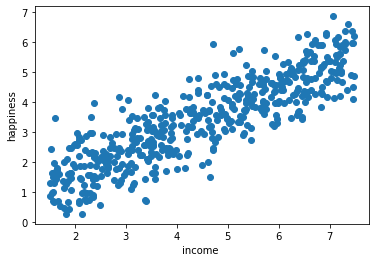

In [86]:
# cuando tenemos variables aleatorias es muy útil usar scatter
# en realidad es una variable de plot con el marker predeterminado
pl.scatter(income, happiness)
pl.xlabel('income ');
pl.ylabel('happiness');

Solo mirando el gráfico ya vemos que están claramente relacionados, cuando sube el salario sube la felicidad. Pero vamos a cuantificarlo, porque como antes, no siempre podemos ver todos los datos. Para eso haremos una **regresión lineal**. Que básicamente mimiza la distancia entre el valor observado de happiness y el valor estimado con la recta

d = [(income * a + b) - happiness]**2

In [26]:
recta = np.polyfit(income, happiness, 1)
recta
# en recta [0] está la pendiente a
# en recta [1] está la constante b
# happiness = a * income + b

array([0.71382551, 0.2042704 ])

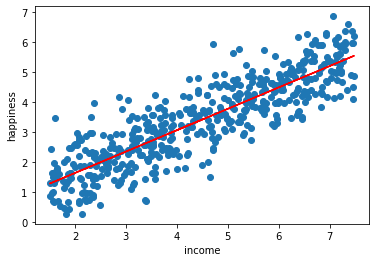

In [27]:
pl.scatter(income, happiness)
pl.plot(income, recta[0] * income + recta[1], 'r')
pl.xlabel('income');
pl.ylabel('happiness');

<img src="img/hapinnesIncome.jpg" width=500 height=400 />

Si a > 0 se relacionan postivivamente (si una crece la otra también) mientras que si a es negativa se relacionan negativamente (cuando una crece la otra decrece). Si es 0 suele ser que no están relacionadas linearmente, vemos un ejemplo.  

-0.028157413112929814 0.1678167283725567


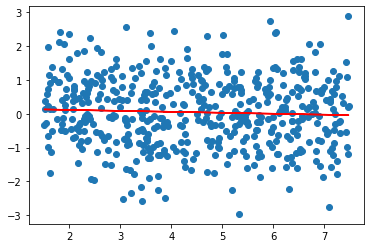

In [28]:
# lanzamos números aleatorios y vemos si están relacionados
# con el income
r = np.random.normal(size = len(income))
pl.scatter(income,r)
recta = np.polyfit(income, r, 1)
print(recta[0],recta[1])
pl.plot(income, income * recta[0] + recta[1],'r');

Para tener una cuantificación más clara de si la variables están relacionadas se usa el **coeficiente de determinación**:

$R^2=\left(\frac{\sigma_{XY}}{\sigma_Y\sigma_X}\right)^2$. 

Este coeficiente nos transmite la idea de en qué medida el conocimiento de X determina el conocimiento de Y, así si R = 0, no sirve de nada conocer X para saber algo de Y. Mientras que si es 1, conociendo X determina completamente el conocimiento de Y. Usamos la función de **NumPy** `corrcoef`:


In [58]:
np.corrcoef(income, happiness)**2

array([[1.        , 0.74932175],
       [0.74932175, 1.        ]])

In [59]:
np.corrcoef(income, happiness)[0,1]**2

0.7493217544857415

In [60]:
np.corrcoef(income, r)[0,1]**2

0.002244466908573693

**Correlación**

Cuando las dos variables son aleatorias miraremos la correlación entre ellas usando el coeficiente de correlación lineal 

$\rho = \frac{\sigma_{XY}}{\sigma_Y\sigma_X}$

Este puede ser entre -1 y 1 y nos dirá como se relacionan ambas variables, si es 0 no hay correlación mientras que si es 1 o -1 es máxima en uno u otro sentido. Este análisis solo sirve si la relación es lineal. Puede que haya variables relacionadas pero que den una correlación pequeña. 

* Covarianza:
Cuando tenemos varias columnas de datos es útil calcular la matriz de covarianza ($C$) para ver los datos que presentan más correlación. $C_{ii}$ tendremos las varianzas de cada variable y en las columnas $C_{ij}$ las covarianzas, es una matriz simétrica, por lo que $C_{ij} = C_{ji}$.

Vemos un ejemplo:

In [66]:
# Calculamos la matriz de covarianza de las alturas y los pesos co
np.cov(x,y)

array([[ 61.76108374,  72.        ],
       [ 72.        , 154.64285714]])

* Correlación. 
La matriz de correlación nos da cuenta de la intensidad de la correlación entre variables. En este caso los elementos de la diagonal son siempre 1, y fuera de la diagonal se muestra el coeficiente de correlación. Este va de -1 a 1. 

In [68]:
# también podemos calcular el coeficiente de correlación
np.corrcoef(x,y)

array([[1.        , 0.73673298],
       [0.73673298, 1.        ]])

- Representación gráfica

Text(0, 0.5, 'Peso (kg)')

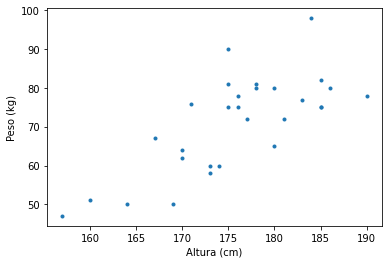

In [74]:
pl.plot(x, y, '.')
pl.xlabel("Altura (cm)")
pl.ylabel("Peso (kg)")

también podría intentar ajusta una recta para tener una relación entre ambas variables


Text(0, 0.5, 'Peso (kg)')

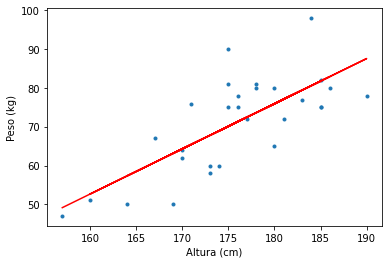

In [75]:
recta = np.polyfit(x, y, 1)
pl.plot(x, y, '.')
pl.plot(x, x*recta[0]+recta[1],'r')
pl.xlabel("Altura (cm)")
pl.ylabel("Peso (kg)")

**A tener en cuenta**

* Recordad que si la relación no es lineal pueden darnos coeficientes pequeños y pensamos que las variables no están relacionadas pero si lo están. 
* Si una variable es controlada se puede hablar de regresión pero no de correlación. 
* Solo por el hecho de que dos variables estén correlacionadas no establece una relación **causa - efecto**. Ejemplos: 

    - Número de helados vendidos por mes y número de muertes por ahogamiento en el mar probablemente muestran correlación ya que ambas variables aumentan en verano, pero evidentemente ninguna es la causa de la otra.

    - Número de cigüeñas en Noruega y número de nacimientos están ligeramente correlacionados. Llegada en la primavera coincide 9 meses después del pico del verano. 

    - Se ha visto que hay correlación negativa entre coger el metro y riesgo de parada cardiovascular. La gente que coge el metro anda más, y eso si tene relación.

Podéis ver más correlaciones spureas curiosas en [aquí](http://tylervigen.com/spurious-correlations)

## 4. Ejercicios para practicar

1.1 Escribe dos funciones " a mano" una que te calcule la moda de unos datos y otra la skewness con las definiciones dadas en la notebook. 

1.2 Lanza números aleatorios con una distribución normal con 100 números con media = 2 y dispersión = 1. Lanza otra con 10000 números. Visualizalas. Haz lo mismo para una función gamma con shape = 3. 

1.3 Qué podrías decir sobre los valores de la moda y de la skewness que esperarías de ambas distribuciones antes de hacer el cálculo?

1.4 Usa tus funciones para calcular la moda y la skewness de esos datos. Compara los ejercicios con la función mode y skewness de los paquetes de estadística dados en la notebook.

1.5 ¿Qué conclusiones podrías sacar de este ejercicio?


Recuerda que puedes ver como generar números aleatorios en https://numpy.org/doc/1.16/reference/routines.random.html



In [ ]:
# Código

2. En el archivo data/DoctoresUranio.csv figuran el número de doctorados en matemáticas en EEUU y la canditad de Uranio almacenado en centrales nucleares de EEUU (en millones de libras) entre los años 1996 y 2008.

* Representa los datos gráficamente.

* Calcula el coeficiente de correlación lineal y comenta cómo de grande es el grado de asociación entre ambas variables. ¿Podríais hacer una predicción de la cantidad de Uranio almacenada en 2020 conociendo el número de doctorados en matemáticas?

In [84]:
# Código